In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
import numpy as np

data=pd.read_csv("nhanes_2015_2016.csv")
data.columns

Index(['SEQN', 'ALQ101', 'ALQ110', 'ALQ130', 'SMQ020', 'RIAGENDR', 'RIDAGEYR',
       'RIDRETH1', 'DMDCITZN', 'DMDEDUC2', 'DMDMARTL', 'DMDHHSIZ', 'WTINT2YR',
       'SDMVPSU', 'SDMVSTRA', 'INDFMPIR', 'BPXSY1', 'BPXDI1', 'BPXSY2',
       'BPXDI2', 'BMXWT', 'BMXHT', 'BMXBMI', 'BMXLEG', 'BMXARML', 'BMXARMC',
       'BMXWAIST', 'HIQ210'],
      dtype='object')

## Question 1:

Make a scatter plot showing the relationship between the first and second measurements of diastolic blood pressure (BPXDI1 and BPXDI2)

In [2]:
data['BPXDI1']

0       70.0
1       88.0
2       46.0
3       72.0
4       70.0
        ... 
5730    48.0
5731    68.0
5732    56.0
5733    62.0
5734    66.0
Name: BPXDI1, Length: 5735, dtype: float64

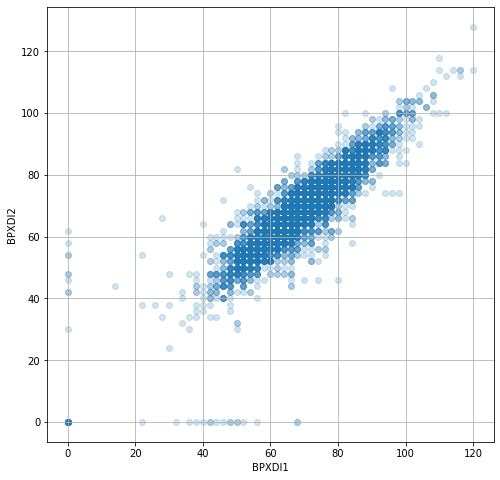

In [3]:
plt.figure(figsize=(8,8))
plot=sns.regplot(x=data['BPXDI1'],y=data['BPXDI2'],data=data,fit_reg=False,scatter_kws={"alpha":0.2})
plt.grid()

In [4]:
data['BPXDI1'].corr(data['BPXDI2'])

0.8847218366965725

In [5]:
data["RIAGENDRx"] = data.RIAGENDR.replace({1: "Male", 2: "Female"}) 
print(data.loc[data.RIAGENDRx=="Female", ["BPXDI1", "BPXDI2"]].dropna().corr())
print(data.loc[data.RIAGENDRx=="Male", ["BPXDI1", "BPXDI2"]].dropna().corr())

          BPXDI1    BPXDI2
BPXDI1  1.000000  0.887086
BPXDI2  0.887086  1.000000
          BPXDI1    BPXDI2
BPXDI1  1.000000  0.880989
BPXDI2  0.880989  1.000000


## Question 2
Construct a grid of scatterplots between the first systolic and the first diastolic blood pressure measurement. Stratiy the plot by gender (rows) and by race/ethnicity groups(Columns)

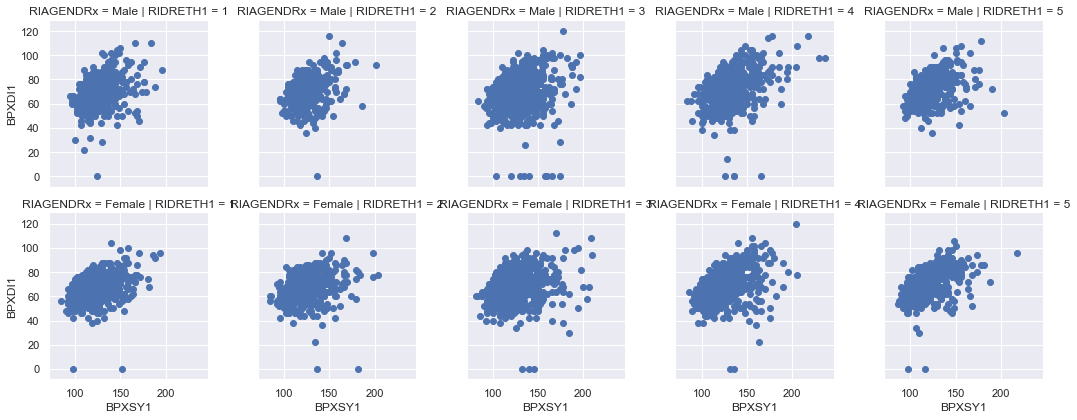

In [6]:
sns.set(style="darkgrid")
strat=sns.FacetGrid(data,col='RIDRETH1',row='RIAGENDRx').map(plt.scatter,'BPXSY1','BPXDI1')

## Question 3
Use violin plots to compare the distributions of ages within groups defined by gender and educational attainment

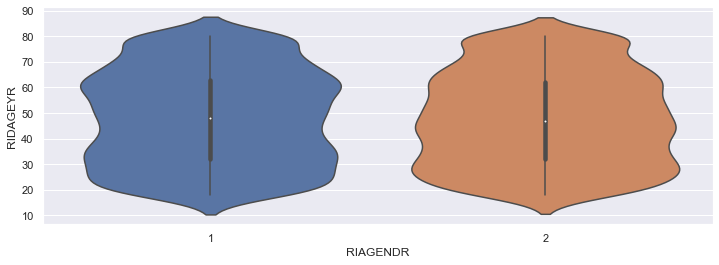

In [7]:
plt.figure(figsize=(12, 4))
a=sns.violinplot(data.RIAGENDR, data.RIDAGEYR) 

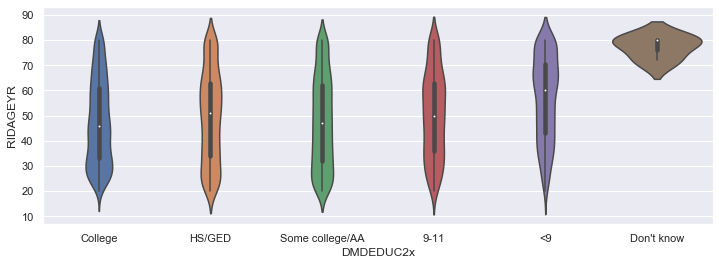

In [8]:
data["DMDEDUC2x"] = data.DMDEDUC2.replace({1: "<9", 2: "9-11", 3: "HS/GED", 4: "Some college/AA", 5: "College", 
                                       7: "Refused", 9: "Don't know"})
plt.figure(figsize=(12, 4))
b=sns.violinplot(data.DMDEDUC2x, data.RIDAGEYR)